# ML Project 3 - Advanced Machine Learning Methods

## Ruixuan Pan

## Data Selected and Objective

### The dataset selected for this project contains the information about historical performance of Google stock from 2016 to 2021, which is listed in the NYSE. A top global marketing consulting firm named FinSynetic wants to assess the prospect of Google in the stock market for clients that invested in it, FinSynetic forms a ML prject group responsible for creating a ML model that provides robust performance over long period of time and precise predictions. The objective is to evaluate diffenrent neutral network models and determine the best model to be implemented by FinSynetic for further analysis.

### The overview of the data records day-to-day stock market price, the attributed used are the following:
#### symbol : - Name of the company (in this case Google).
#### date :- year and date
#### close:- closing of stock value
#### high:- highest value of stock at that day
#### low:- lowest value of stock at that day
#### open:- opening value of stock at that day
#### volume - volume traded in the stock market
#### adjClose - adjusted closing price
#### adjHigh - adjusted highest value
#### adjLow - adjusted lowest value
#### adjOpen - adjusted opening value
#### adjVolume - adjusted volume
#### divCash - dividend cash
#### splitFactor - split factor

In [1]:
import pandas as pd
Google_stock = pd.read_csv("GOOG.csv")
Google_stock.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


## Data Preprocessing

In [3]:
## check for missing value
Google_stock.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [5]:
## check for duplicate values
Google_stock.duplicated().sum()

0

In [7]:
## check datatypes
Google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [3]:
## convert date column to date type
Google_stock['date'] = pd.to_datetime(Google_stock['date'])
Google_stock['date'] = Google_stock['date'].dt.strftime('%d-%m-%Y')
Google_stock['date'] = pd.to_datetime(Google_stock['date'], dayfirst=True)
Google_stock

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
## Remove symbol column
Google_stock.drop(columns="symbol",axis=1,inplace=True)

In [7]:
## check the attributes again
Google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1258 non-null   datetime64[ns]
 1   close        1258 non-null   float64       
 2   high         1258 non-null   float64       
 3   low          1258 non-null   float64       
 4   open         1258 non-null   float64       
 5   volume       1258 non-null   int64         
 6   adjClose     1258 non-null   float64       
 7   adjHigh      1258 non-null   float64       
 8   adjLow       1258 non-null   float64       
 9   adjOpen      1258 non-null   float64       
 10  adjVolume    1258 non-null   int64         
 11  divCash      1258 non-null   float64       
 12  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 127.9 KB


In [9]:
# Provide statistical summary
Google_stock.describe()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,2018-12-12 03:26:02.480126976,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
min,2016-06-14 00:00:00,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,2017-09-12 06:00:00,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,2018-12-11 12:00:00,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,2020-03-12 18:00:00,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2021-06-11 00:00:00,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0
std,NaN,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0


In [7]:
## Feature selection and set date as index
df = Google_stock.loc[:,["date","close","high","low","open","volume"]]
df=df.set_index("date")
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


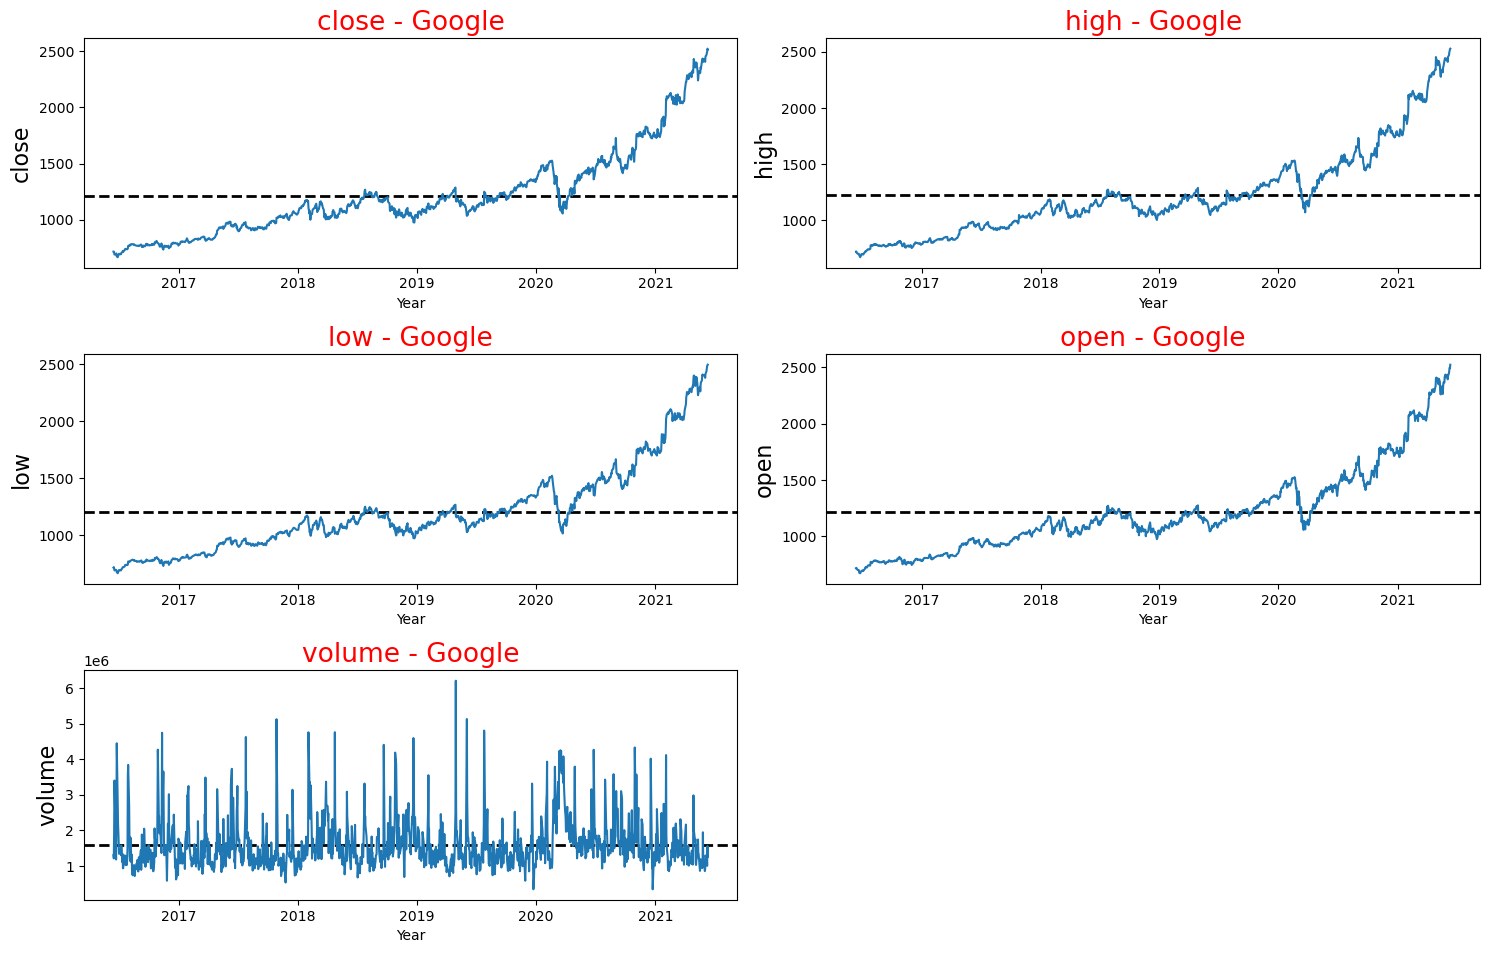

In [9]:
## Visualization of selected data
import matplotlib.pyplot as plt
plt.figure(figsize = (15,25))
for idx, i in enumerate(df):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df.index.values,df[i])
    plt.axhline(df[i].mean(), linestyle='--', lw=2, zorder=1, color='black')
    plt.title(i + " - Google",color='red',fontsize=19)
    plt.xlabel("Year")
    plt.ylabel(i, size = 16)
plt.tight_layout()                     
plt.show()

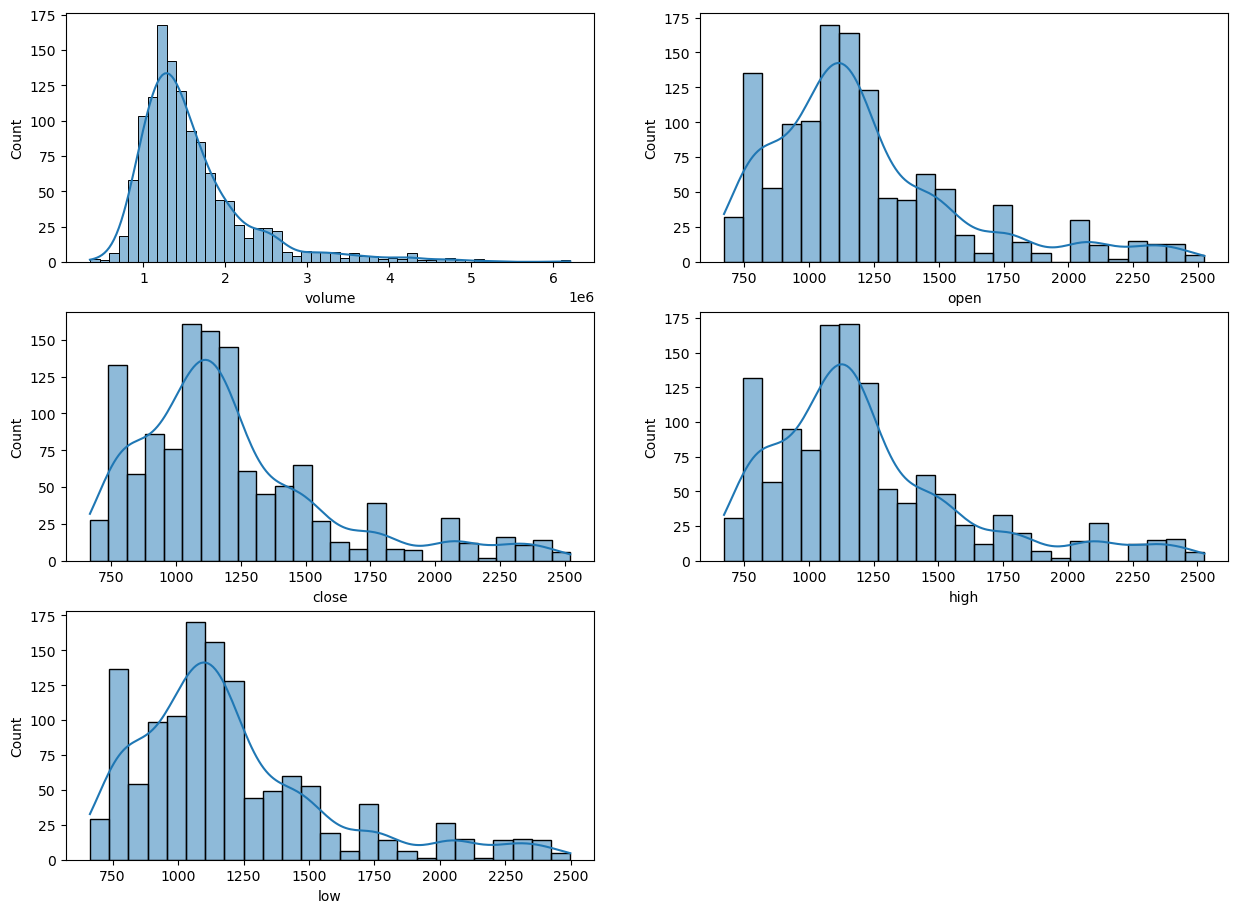

In [10]:
import seaborn as sns
plt.figure(figsize=(15,11))
for i,col in enumerate(['volume','open','close','high','low']):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df,x=col,kde=True)

## Model Selection

In [13]:
## import libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout

In [15]:
# choose low, high, open, and close as relevant attributes
train_set = df.iloc[:,:4]

# standardize using Min-Max Scaler
Scaler = MinMaxScaler()
train_normal = Scaler.fit_transform(train_set)

# split the dataset into training set and testing set, with time step of 60
training_size = round(len(train_normal) * 0.80)

train_data = train_normal[:training_size]
test_data  = train_normal[training_size-60:]
train_data = pd.DataFrame(train_data,columns=train_set.columns)
test_data = pd.DataFrame(test_data,columns=train_set.columns)
print(train_data.shape,test_data.shape)

(1006, 4) (312, 4)


In [17]:
# create training data sequence and label
import numpy as np
def create_sequence(dataset):
    sequences = []
    labels = []
    
    start_idx = 0

    for stop_idx in range(60,len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

print(train_seq.shape, train_label.shape)
print(test_seq.shape, test_label.shape)

(946, 60, 4) (946, 4)
(252, 60, 4) (252, 4)


### LSTM

In [19]:
model = Sequential([
    LSTM(units=60, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])),
    Dropout(0.2),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),
    LSTM(units=60),
    Dropout(0.2),
    Dense(units=4)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

C:\Users\richa\NewAnaConda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,924 (288.77 KB)

 Trainable params: 73,924 (288.77 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# fit the model with batch size of 20 over 100 epoches
epochs = 50
batch_size = 20

history = model.fit(
    train_seq,
    train_label,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_seq, test_label),
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0147 - mean_absolute_error: 0.0895 - val_loss: 0.0199 - val_mean_absolute_error: 0.1112
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0028 - mean_absolute_error: 0.0377 - val_loss: 0.0114 - val_mean_absolute_error: 0.0816
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0018 - mean_absolute_error: 0.0312 - val_loss: 0.0166 - val_mean_absolute_error: 0.1066
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0014 - mean_absolute_error: 0.0271 - val_loss: 0.0239 - val_mean_absolute_error: 0.1328
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0017 - mean_absolute_error: 0.0304 - val_loss: 0.0172 - val_mean_absolute_error: 0.1088
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0015 - mean_absolute_error: 0.0281 - val_loss: 0.0102 - val_mean_absolute_error: 0.0809
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - mean_absolute_error: 0.0255 - val_loss

In [23]:
# predict with the model
test_predicted = model.predict(test_seq)
test_inverse_predicted = Scaler.inverse_transform(test_predicted)
test_inverse_predicted = pd.DataFrame(test_inverse_predicted,columns=['close','high','low','open'],index=train_set.iloc[-252:].index)
test_inverse_predicted

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


,close,high,low,open
date,,,,
2020-06-12,1430.511353,1443.919800,1419.523193,1427.585449
2020-06-15,1413.935913,1428.430298,1402.373535,1411.300903
2020-06-16,1396.573242,1412.038574,1384.382568,1394.005249
2020-06-17,1397.279785,1412.658936,1384.873291,1394.312988
2020-06-18,1411.074585,1425.719482,1398.803223,1407.632812
...,...,...,...,...
2021-06-07,2326.982666,2330.670166,2306.613525,2316.178711
2021-06-08,2354.820068,2356.725098,2335.263672,2343.731445
2021-06-09,2385.340820,2385.188232,2366.542725,2374.207031


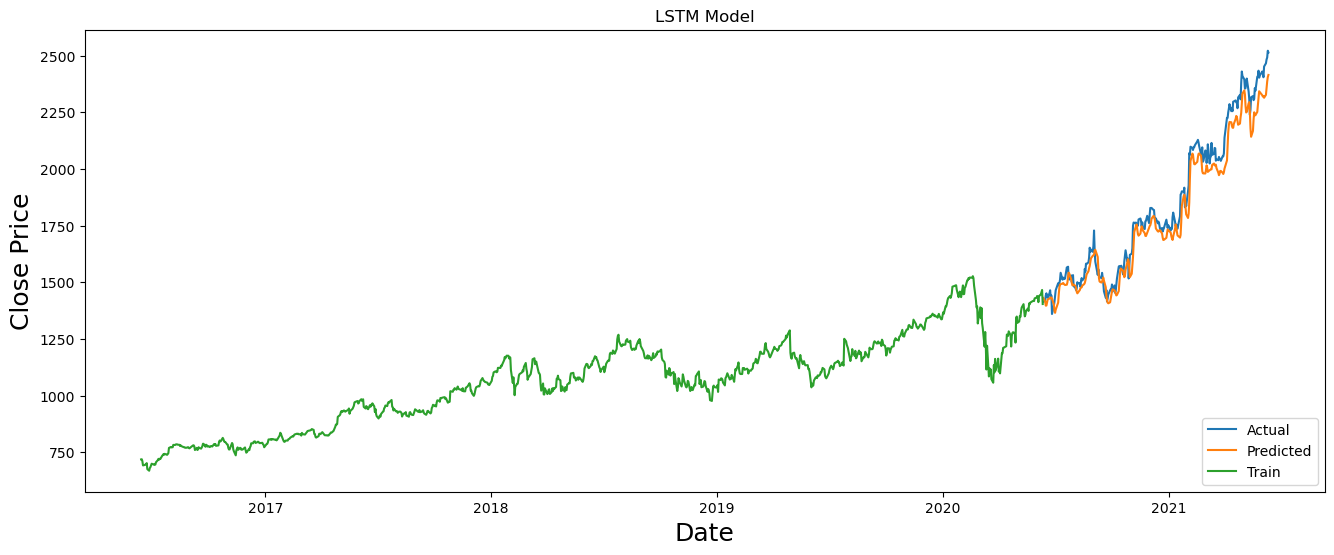

In [25]:
actual = train_set[-252:]
train = train_set[:-252]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['close'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['close']])
plt.plot(train_set.index[:-252],train['close'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

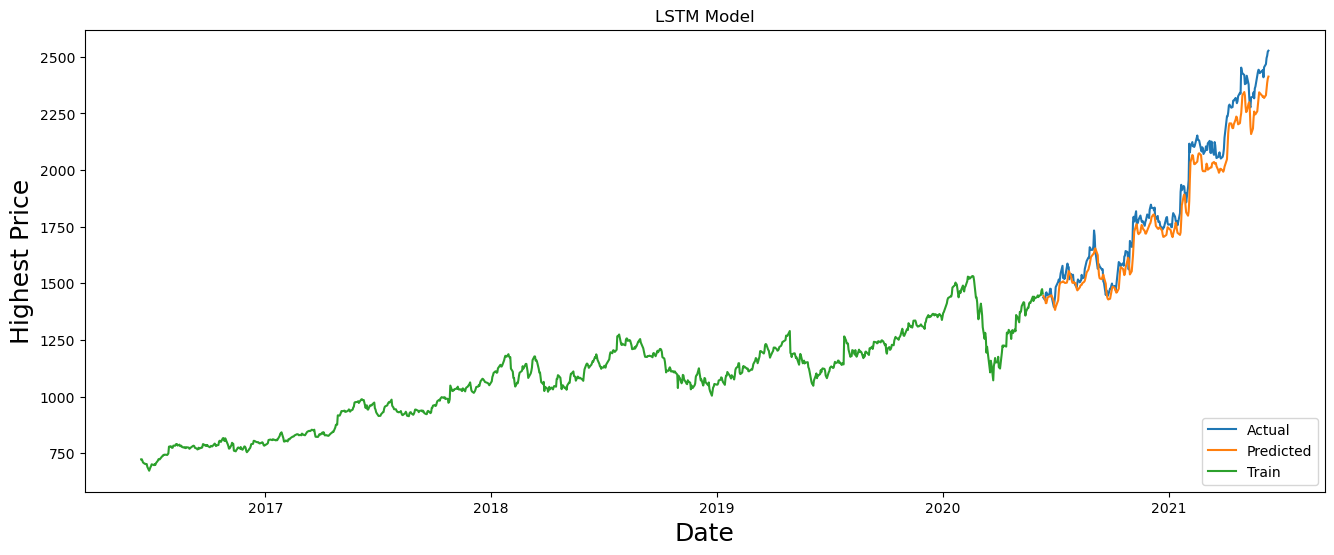

In [27]:
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Highest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['high'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['high']])
plt.plot(train_set.index[:-252],train['high'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

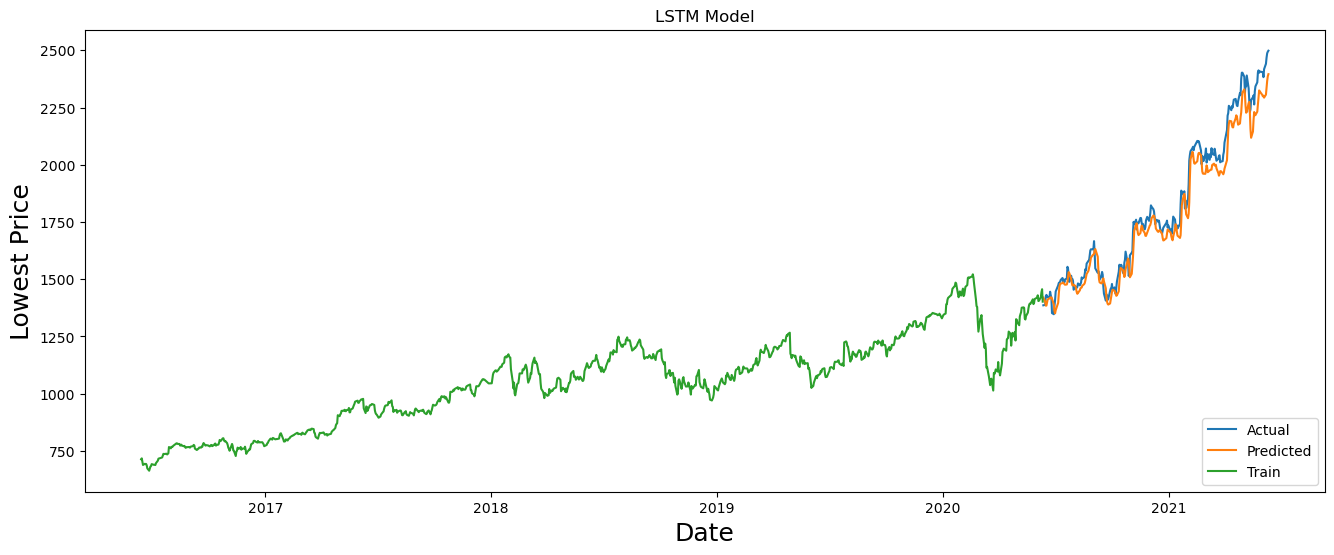

In [29]:
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Lowest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['low'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['low']])
plt.plot(train_set.index[:-252],train['low'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

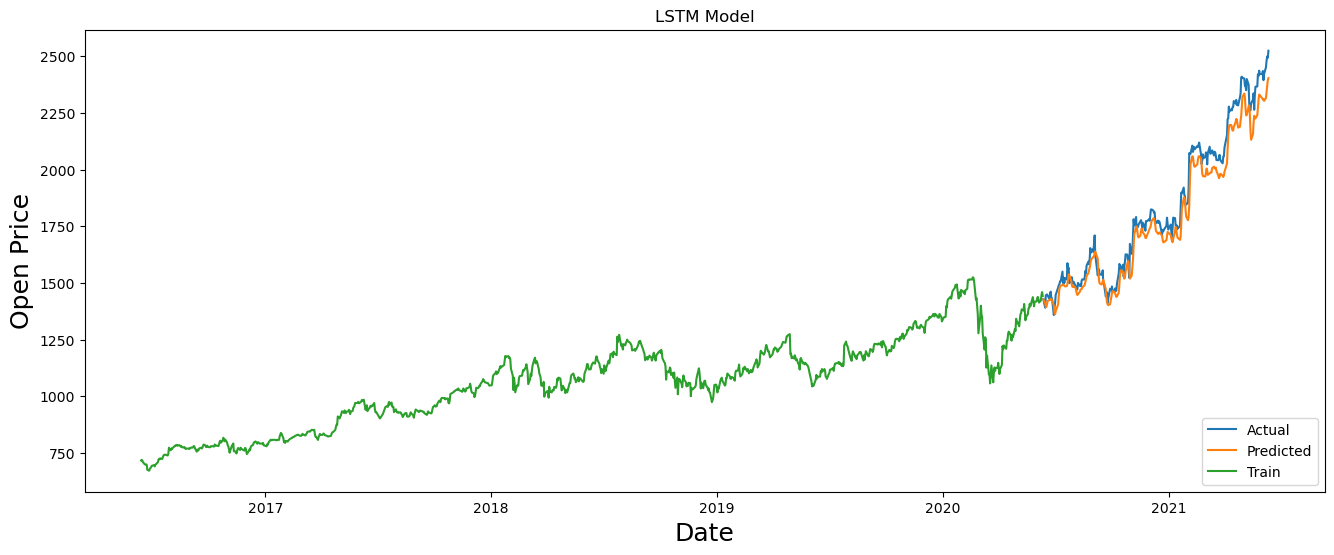

In [31]:
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['open'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['open']])
plt.plot(train_set.index[:-252],train['open'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

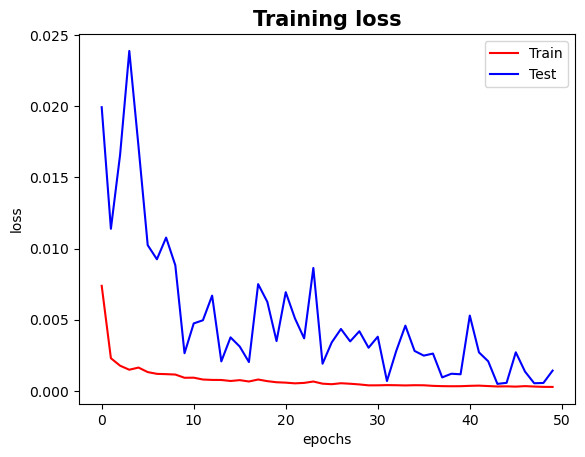

<Figure size 640x480 with 0 Axes>

In [33]:
loss = history.history['loss']
test = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, test, 'b', label='Test')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

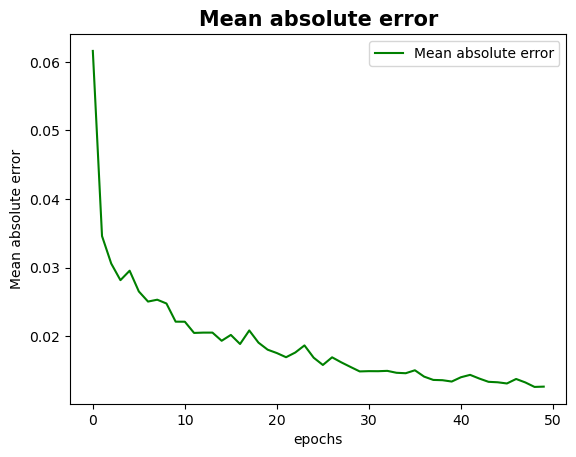

<Figure size 640x480 with 0 Axes>

In [35]:
MAE = history.history['mean_absolute_error']

epochs = range(len(loss))

plt.plot(epochs, MAE, 'g', label='Mean absolute error')
plt.xlabel("epochs")
plt.ylabel("Mean absolute error")
plt.title('Mean absolute error', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_test = np.array(actual)
r2Score_test = r2_score(y_test, test_inverse_predicted)
print('test R2 Score: %.2f ' % (r2Score_test))

rmse = np.sqrt(np.mean(((test_inverse_predicted - y_test) ** 2)))
print("RMSE score: %.2f" % (rmse))

test R2 Score: 0.95 
RMSE score: 69.86


### GRU

In [39]:
model1 = Sequential([
    GRU(units=60, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2]), activation='tanh'),
    Dropout(0.2),
    GRU(units=60, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    GRU(units=60),
    Dropout(0.2),
    Dense(units=4)
])

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model1.summary()

C:\Users\richa\NewAnaConda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 60)         │        11,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 60, 60)         │        21,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 60)             │        21,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,044 (218.92 KB)

 Trainable params: 56,044 (218.92 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# fit the model with batch size of 20 over 100 epoches
epochs = 50
batch_size = 20

history = model1.fit(
    train_seq,
    train_label,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_seq, test_label),
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0143 - mean_absolute_error: 0.0877 - val_loss: 0.0078 - val_mean_absolute_error: 0.0749
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0020 - mean_absolute_error: 0.0327 - val_loss: 0.0016 - val_mean_absolute_error: 0.0306
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0014 - mean_absolute_error: 0.0276 - val_loss: 0.0020 - val_mean_absolute_error: 0.0349
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 9.4064e-04 - val_mean_absolute_error: 0.0231
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0011 - mean_absolute_error: 0.0253 - val_loss: 7.9157e-04 - val_mean_absolute_error: 0.0220
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 9.5086e-04 - mean_absolute_error: 0.0232 - val_loss: 0.0015 - val_mean_absolute_error: 0.0299
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 9.1726e-04 - mean_absolute_error: 0

In [43]:
## predict with the model
test_predicted = model1.predict(test_seq)
test_inverse_predicted = Scaler.inverse_transform(test_predicted)
test_inverse_predicted = pd.DataFrame(test_inverse_predicted,columns=['close','high','low','open'],index=train_set.iloc[-252:].index)
test_inverse_predicted

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


,close,high,low,open
date,,,,
2020-06-12,1432.103516,1441.490356,1413.351807,1419.920288
2020-06-15,1422.137085,1432.328369,1402.944214,1410.134033
2020-06-16,1418.364868,1428.837280,1399.082642,1406.973511
2020-06-17,1445.472778,1454.463989,1428.369263,1435.294678
2020-06-18,1454.887085,1463.405518,1437.960327,1444.797974
...,...,...,...,...
2021-06-07,2434.636719,2431.711914,2413.332275,2406.026367
2021-06-08,2449.155029,2445.547119,2428.002441,2420.755127
2021-06-09,2470.763672,2466.184570,2450.448975,2442.434814


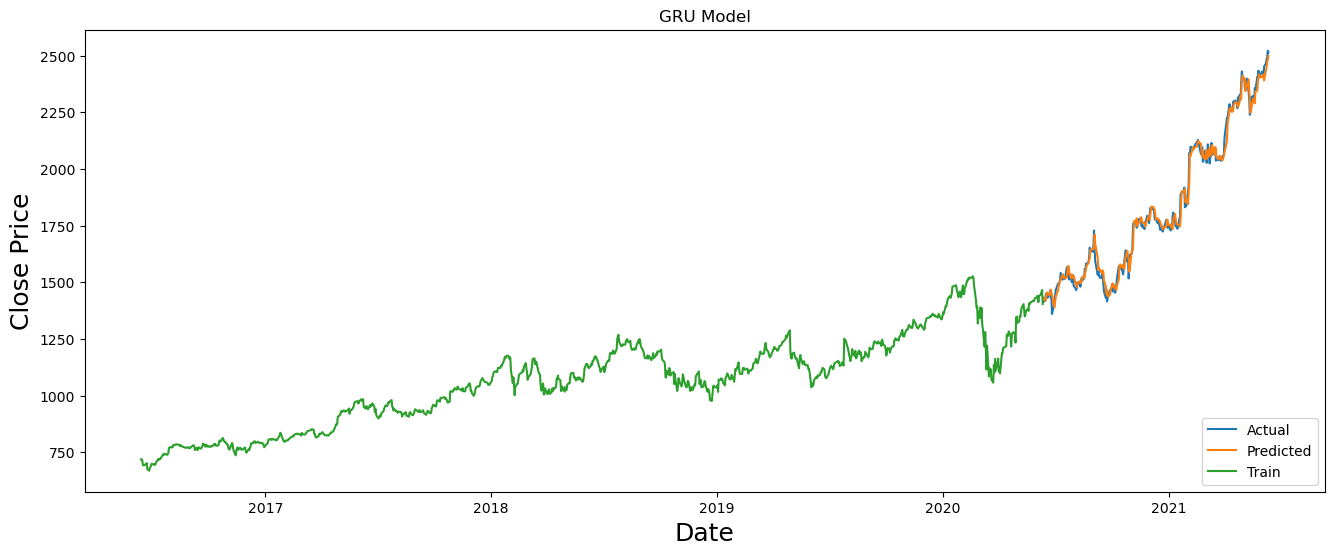

In [45]:
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['close'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['close']])
plt.plot(train_set.index[:-252],train['close'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

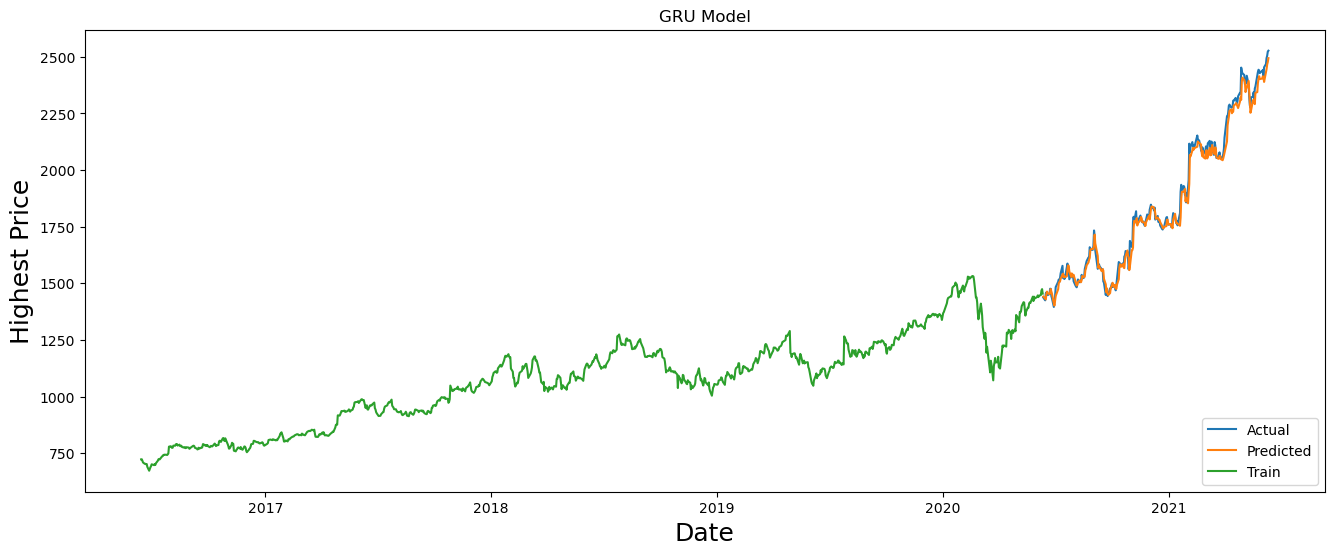

In [47]:
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Highest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['high'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['high']])
plt.plot(train_set.index[:-252],train['high'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

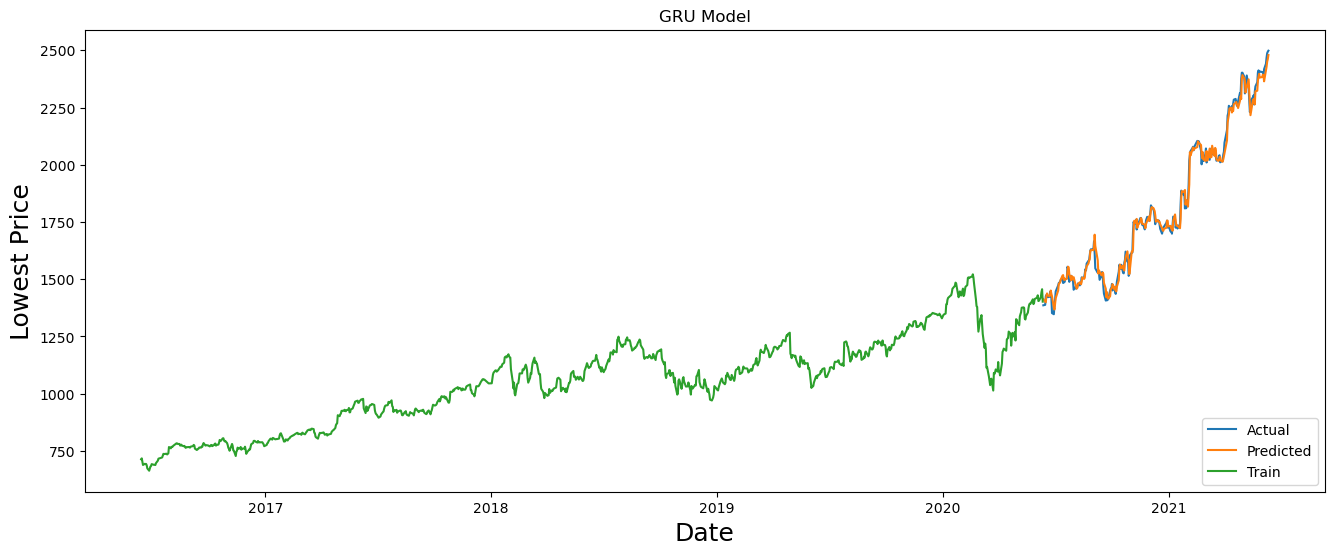

In [49]:
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Lowest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['low'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['low']])
plt.plot(train_set.index[:-252],train['low'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

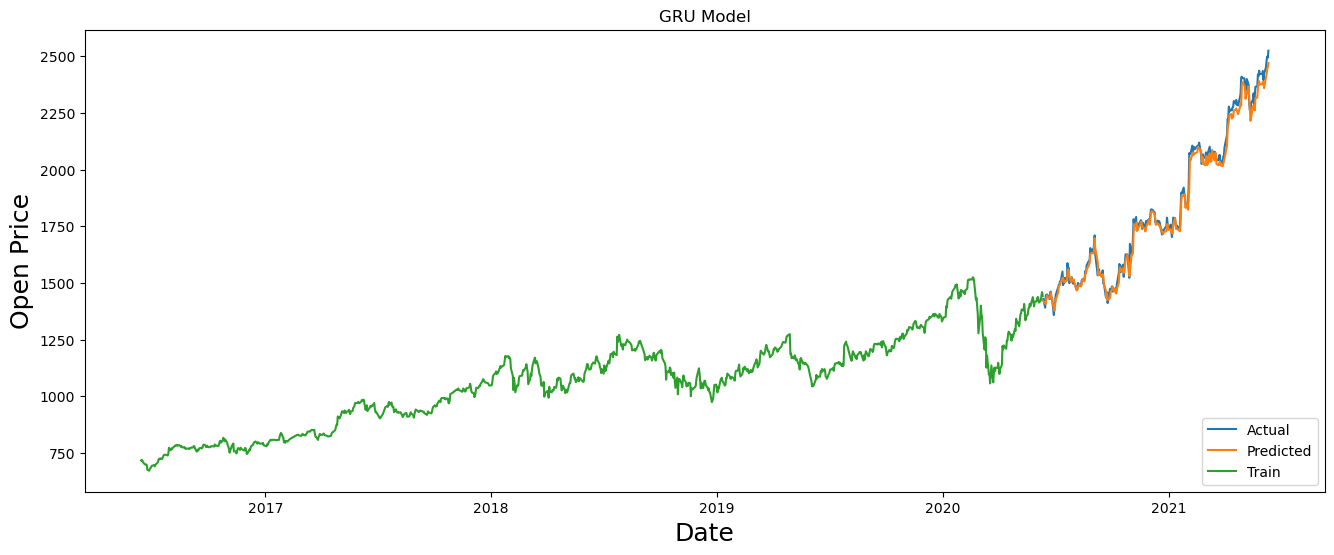

In [51]:
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['open'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['open']])
plt.plot(train_set.index[:-252],train['open'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

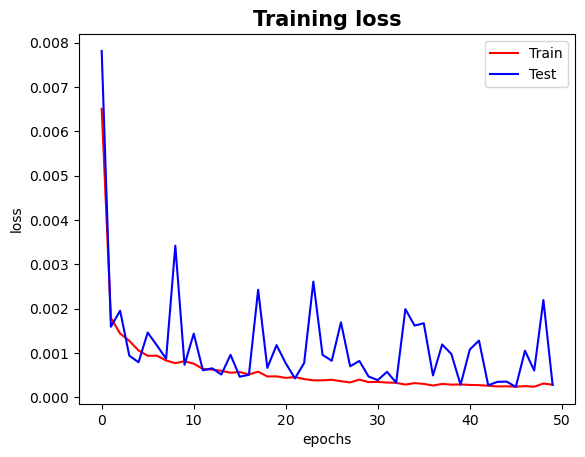

<Figure size 640x480 with 0 Axes>

In [53]:
loss = history.history['loss']
test = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, test, 'b', label='Test')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

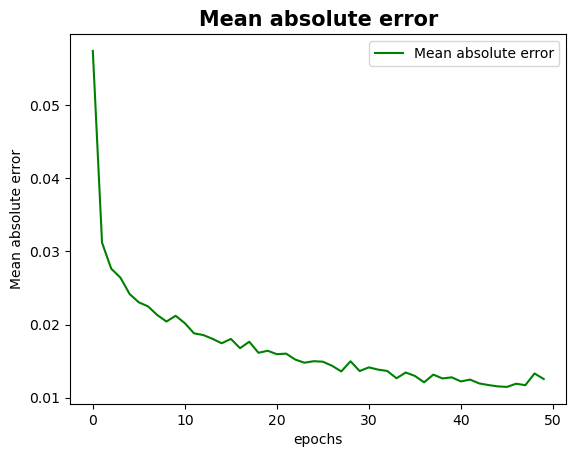

<Figure size 640x480 with 0 Axes>

In [55]:
MAE = history.history['mean_absolute_error']

epochs = range(len(loss))

plt.plot(epochs, MAE, 'g', label='Mean absolute error')
plt.xlabel("epochs")
plt.ylabel("Mean absolute error")
plt.title('Mean absolute error', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [57]:
y_test = np.array(actual)
r2Score_test = r2_score(y_test, test_inverse_predicted)
print('test R2 Score: %.2f ' % (r2Score_test))

rmse = np.sqrt(np.mean(((test_inverse_predicted - y_test) ** 2)))
print("RMSE score: %.2f" % (rmse))

test R2 Score: 0.99 
RMSE score: 31.08


### SimpleRNN

In [59]:
model2 = Sequential([
    SimpleRNN(units=60, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])),
    Dropout(0.2),
    SimpleRNN(units=60, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=60),
    Dropout(0.2),
    Dense(units=4)
])

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model2.summary()

C:\Users\richa\NewAnaConda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 60)         │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 60)         │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,664 (72.91 KB)

 Trainable params: 18,664 (72.91 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# fit the model with batch size of 20 over 100 epoches
epochs = 50
batch_size = 20

history = model2.fit(
    train_seq,
    train_label,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_seq, test_label),
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3281 - mean_absolute_error: 0.4504 - val_loss: 0.1955 - val_mean_absolute_error: 0.3764
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1128 - mean_absolute_error: 0.2648 - val_loss: 0.0536 - val_mean_absolute_error: 0.1826
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.1722 - val_loss: 0.0437 - val_mean_absolute_error: 0.1664
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0271 - mean_absolute_error: 0.1279 - val_loss: 0.0471 - val_mean_absolute_error: 0.1683
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0168 - mean_absolute_error: 0.0994 - val_loss: 0.0307 - val_mean_absolute_error: 0.1447
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0813 - val_loss: 0.0220 - val_mean_absolute_error: 0.1185
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0703 - val_loss

In [63]:
test_predicted = model2.predict(test_seq)
test_inverse_predicted = Scaler.inverse_transform(test_predicted)
test_inverse_predicted = pd.DataFrame(test_inverse_predicted,columns=['close','high','low','open'],index=train_set.iloc[-252:].index)
test_inverse_predicted

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


,close,high,low,open
date,,,,
2020-06-12,1451.180176,1472.519165,1445.959961,1439.674438
2020-06-15,1428.635864,1453.113770,1408.085693,1419.256836
2020-06-16,1419.172363,1444.638550,1403.391235,1442.919556
2020-06-17,1418.781738,1419.293335,1394.456665,1433.518799
2020-06-18,1442.272705,1460.204956,1431.552856,1454.623047
...,...,...,...,...
2021-06-07,2338.503662,2381.243896,2319.727295,2344.799072
2021-06-08,2358.047852,2393.875000,2335.523682,2364.064453
2021-06-09,2375.552246,2420.114014,2355.966309,2372.993164


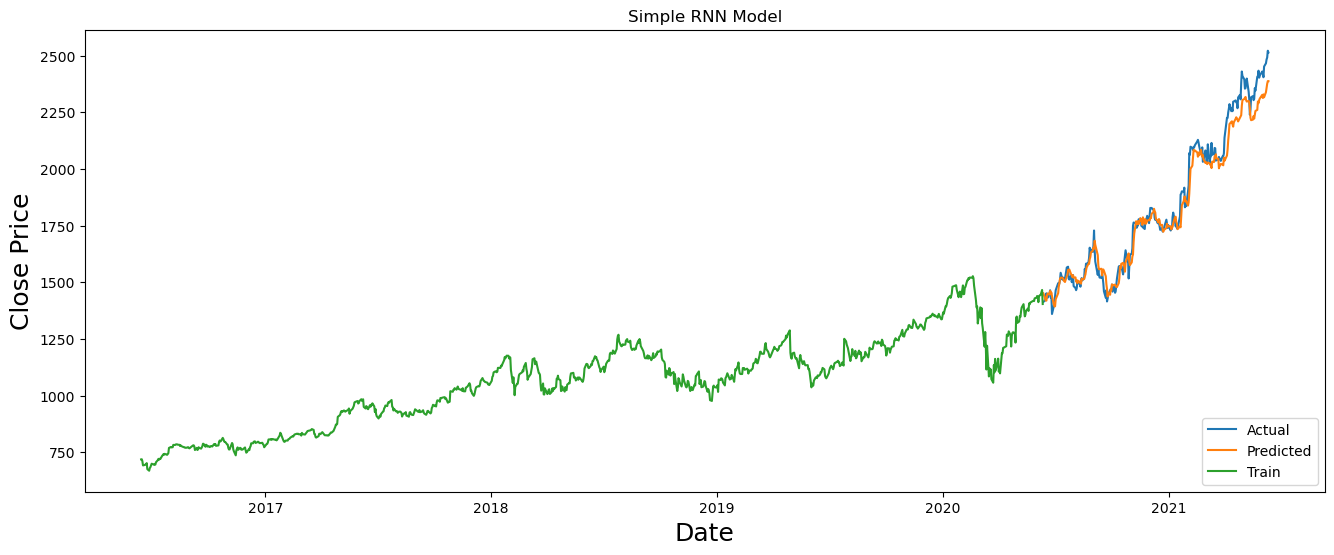

In [65]:
plt.figure(figsize=(16,6))
plt.title('Simple RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['close'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['close']])
plt.plot(train_set.index[:-252],train['close'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

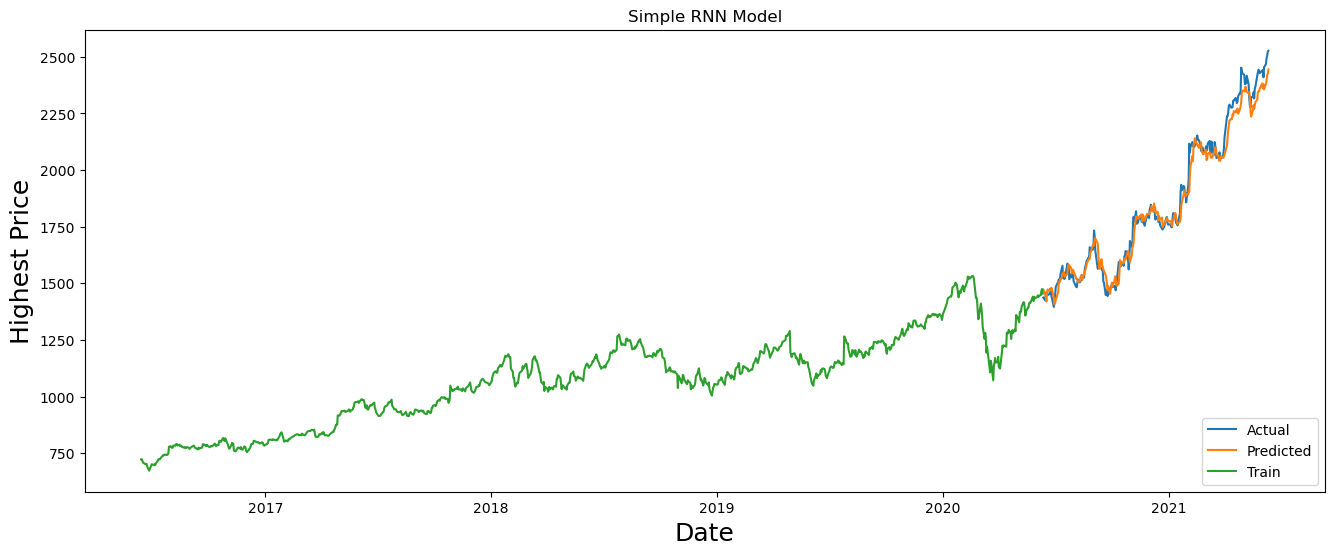

In [67]:
plt.figure(figsize=(16,6))
plt.title('Simple RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Highest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['high'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['high']])
plt.plot(train_set.index[:-252],train['high'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

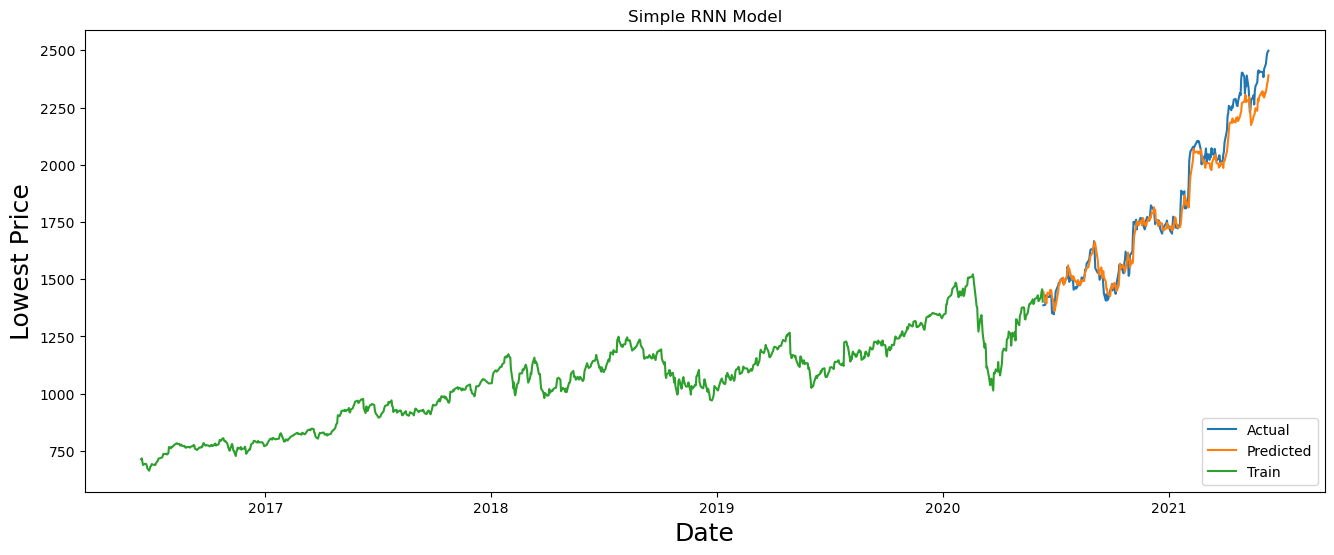

In [69]:
plt.figure(figsize=(16,6))
plt.title('Simple RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Lowest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['low'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['low']])
plt.plot(train_set.index[:-252],train['low'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

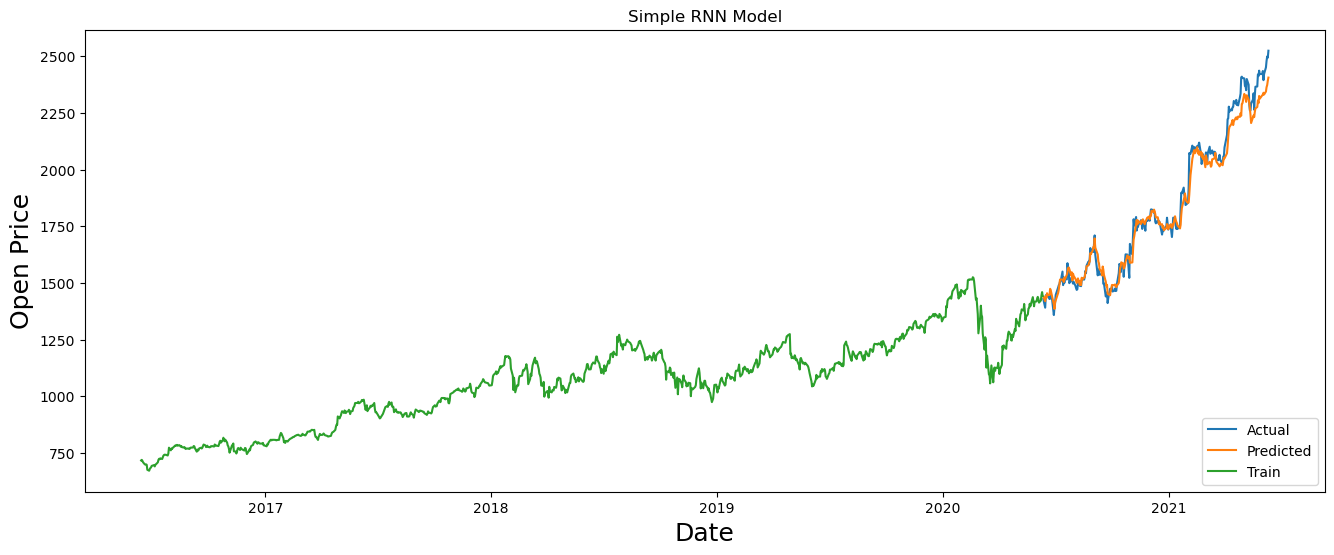

In [71]:
plt.figure(figsize=(16,6))
plt.title('Simple RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['open'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['open']])
plt.plot(train_set.index[:-252],train['open'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

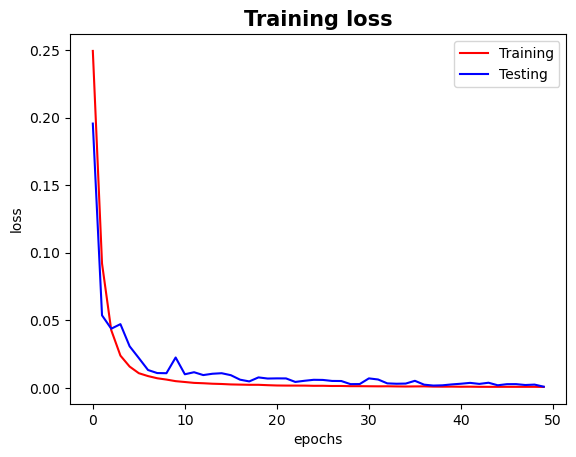

<Figure size 640x480 with 0 Axes>

In [73]:
loss = history.history['loss']
test = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training')
plt.plot(epochs, test, 'b', label='Testing')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

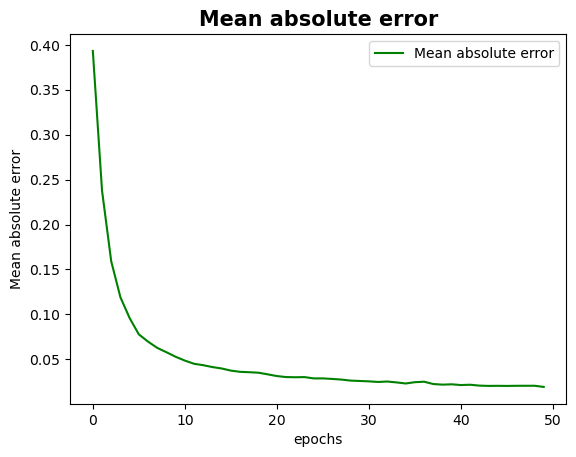

<Figure size 640x480 with 0 Axes>

In [75]:
MAE = history.history['mean_absolute_error']

epochs = range(len(loss))

plt.plot(epochs, MAE, 'g', label='Mean absolute error')
plt.xlabel("epochs")
plt.ylabel("Mean absolute error")
plt.title('Mean absolute error', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [77]:
y_test = np.array(actual)
r2Score_test = r2_score(y_test, test_inverse_predicted)
print('test R2 Score: %.2f ' % (r2Score_test))

rmse = np.sqrt(np.mean(((test_inverse_predicted - y_test) ** 2)))
print("RMSE score: %.2f" % (rmse))

test R2 Score: 0.97 
RMSE score: 53.16


## Report Summary

### Before preparation of data for modeling, key metrics were assessed with visualizations. For the time series graphs, the trend is consistently moving upward until the year of 2020, which it is affected by COVID-19 pandemic as the stock price drops dramatically. However it then recovers back up by adjusting to the economic condition following the shock. Same thing happends to the trading volume where it fluctuates at the level of the mean until year 2020 when the surge in volume appears, then returns to its normal state. The histograms show that most of the stock prices listed in the historical data ranges from 750 USD to 1500 USD, the distribution of the trading volume is nearly bell-shaped skewed to the left, the mode of the distribution is centered at the value of approximately 1400000.

### The Recurrent Neutral Networks tested in this project are LSTM, GRU, and Simple RNN, all of the model uses 50 epochs and batch size of 20. 80% of the data is used for training and 20% for testing, with the timestamp of 60 (taking 60 previous data points to predict next 60 data points) and standardized using MinMax Scaler. While the prediction results (orange line) are close to the actual stock price (blue line) in the testing set, as demonstrated in the line graphs for close price, open price, highest price, and lowest price, the GRU model provides the best prediction among the three models tested, as the gap between the two sets of lines is the smallest in the graphs, the R square of 99% and RMSE score of 31.08 on the testing data indicating the model has excellent accuracy in capturing the trend from the past to predict future. The learning curve in the training loss graphs show a decreasing reciprocal relationship between epochs and validation loss, however the validation loss curve for LTSM and GRU shows rather unsmooth characteristic indicating that the model is not in stable state when validating test data, whereas the validation loss curve in simple RNN model has smooth decline indicating a good fit to the test data. In the MAE analysis, both LTSM and GRU has bumpy curve while the trend of loss is decreasing, unlike the MAE in Simple RNN.

### The purpose of the assessment can be critical in predicting the trend of stock value over specific period of time, especially when many unpredictable factors such as raise of interest rates, advancement of product development, and sudden economic impacts can deviate the outcome of trend. The neutral network is very effective in learning from the past and forecast based on the patterns observed, which gives economists and monetary policy makers the clear overview about the stock marker, helping them prepare action plans to either save the economy, make wise financial decision, and identify the risks.

## Reflection

### The main challenge encountered throughout the project has been the fine tuning the model selected, this can be presented as how to set the ideal parameters, such as building up layers for the model, number of epochs and batch size, and determine the timestamp steps of prediction. The insight gained from the report reveals that the RNN models are more efficient methods of predicting the stock market price through involvement of machine learning and model training, which optimized the prediction precision with multiple experiments of different batches on different epochs. This allows financial professionals to be more confident about their forecast as the prediction results are validated against the testing data, selected from the historical data treated as the future trend at a specific time.